# Sistema de recomendación


## 1. Pipeline. Tubería o fila

Puedo modificar los atributos de cada uno de los modulos de un solo comando

Mod 1: Selector de características
    k-características más relevantes
    
Mod 2: Clasificador de bosques aleatorios


## 2. Narest-Neighbor - Vecinos más cercanos

Mirar conr especto a alguna distancia cuales son los vecinos más cercanas 

Divide por la mediana, en especie de arbol, se utiliza para clasificación


## 3. K-NN 
k- Vecinos más cercanos 


# Construcción de un sistema de recomendación

## Construcción de un pipeline (filtro)

In [1]:
# importamos librerias

from sklearn.datasets import samples_generator # Generamos un toyset
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier 

In [2]:
# toyset de 150 observaciones con 25 caracteristicas, de las cuales 6 son informativas y adicionalmente 0 redundantes

X,y = samples_generator.make_classification(n_samples=150, n_features=25, n_classes=3, n_informative=6, n_redundant=0, random_state= 7)


In [3]:
# Primer modulo del pipeline, selector de características

selector = SelectKBest(f_regression, k=9)


# Segundo módulo del pipeline, clasificador de bosques BEA
clasificador = ExtraTreesClassifier(n_estimators = 60, max_depth = 4)

# Creamos el pipeline

pipeline = Pipeline([('selec', selector),('elelegido', clasificador)])


# Fijamos los parametros

pipeline.set_params(selec__k = 7, elelegido__n_estimators = 30)

Pipeline(steps=[('selec', SelectKBest(k=7, score_func=<function f_regression at 0x0000021DF560A950>)), ('elelegido', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

In [4]:
# Entrenamos la tubería 
pipeline.fit(X, y)

# Predicción de las salidas 

salida = pipeline.predict(X)

In [5]:
# Evaluamos la eficiencia con el score está entre 0-1
print('El score del pipeline es:', pipeline.score(X,y))

El score del pipeline es: 0.886666666667


In [6]:
# revisar las características del selector

status = pipeline.named_steps['selec'].get_support()
print(status)

[False False False False  True False False  True  True False False False
  True False  True False False  True False False False False  True False
 False]


In [7]:
caracteristicas_selec = [i for i, x in enumerate(status) if x]

print(caracteristicas_selec)

[4, 7, 8, 12, 14, 17, 22]


## Algoritmo Nearest-Neighbors NN

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [9]:
# Creamos un toyset de 2D, es decir que solo tiene dos caracteristica 

X = np.array([[2.1,1.3],[1.3,3.2], [2.9, 2.5], [2.7,5.4], [3.8, 0.9], [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9], [5.7, 3.5], [6.1,4.3], [5.1, 2.2], [6.2, 1.1]])


print(X)

[[ 2.1  1.3]
 [ 1.3  3.2]
 [ 2.9  2.5]
 [ 2.7  5.4]
 [ 3.8  0.9]
 [ 7.3  2.1]
 [ 4.2  6.5]
 [ 3.8  3.7]
 [ 2.5  4.1]
 [ 3.4  1.9]
 [ 5.7  3.5]
 [ 6.1  4.3]
 [ 5.1  2.2]
 [ 6.2  1.1]]


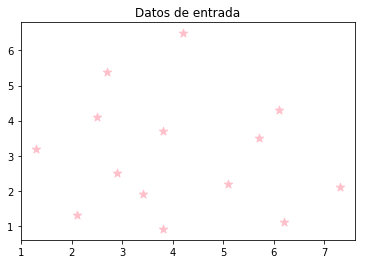

In [10]:
# definimos el numero de vecinos más cercanos
k = 5

# creamos una muestra para el test
test = [4.3, 2.7]


# CARPINTERIA

# Graficar los datos de entrada

plt.figure()
plt.title('Datos de entrada')
plt.scatter(X[:,0], X[:,1], marker = '*', s = 75, color='pink')
plt.show()

In [11]:
modelo_nn = NearestNeighbors(n_neighbors= k, algorithm='ball_tree').fit(X)
distancias, indices = modelo_nn.kneighbors(test)


print('Los vecinos mas cercanos')

for rank, index in enumerate(indices[0][:k], start=1):
    print(str(rank) + '----->', X[index])

Los vecinos mas cercanos
1-----> [ 5.1  2.2]
2-----> [ 3.8  3.7]
3-----> [ 3.4  1.9]
4-----> [ 2.9  2.5]
5-----> [ 5.7  3.5]


C:\Users\llondono2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


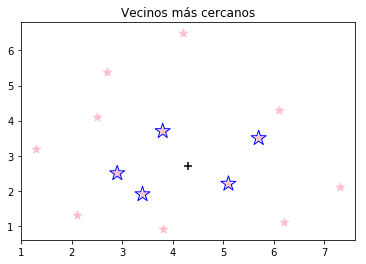

In [12]:
plt.figure()
plt.title('Vecinos más cercanos')
plt.scatter(X[:,0], X[:,1], marker = '*', s=75, color = 'pink')

plt.scatter(X[indices][0][:][:,0], X[indices][0][:][:,1], marker = '*', s=250, color='blue', facecolors= 'none')

plt.scatter(test[0], test[1], marker='+', s=75, color='k')

plt.show()

## Algoritmo para clasificador k-NN

In [13]:
# cargamos librerías
import numpy as np
import matplotlib.pyplot
import matplotlib.cm as cm
from sklearn import neighbors, datasets

In [14]:
archivo = 'data.txt'

data = np.genfromtxt(archivo, delimiter=',', skip_header = True)

X,y = data[:,:-1], data[:, -1].astype(np.int)

print(y)

[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0
 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1
 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2
 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3
 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0
 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1
 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2
 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3
 0 1 2 3]


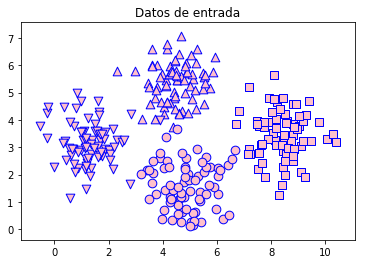

In [15]:
plt.figure()
plt.title('Datos de entrada')
marcadores = 'v^os'
mapper = [marcadores[i] for i in y] # repite la secuencia para llegar al tamaño 

for i in range(X.shape[0]):
    plt.scatter(X[i,0],X[i,1], marker=mapper[i], s = 75, edgecolors='blue', facecolors='pink')
    
plt.show()

In [18]:
# definir el número de vecinos
NN = 6

# creamos el clasificador 

clasificador = neighbors.KNeighborsClassifier(NN, weights = 'distance')


# entrenamos 
clasificador.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

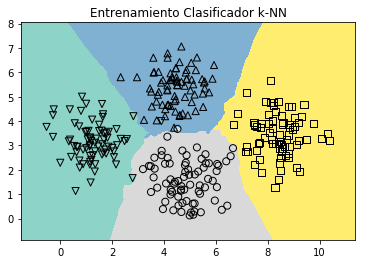

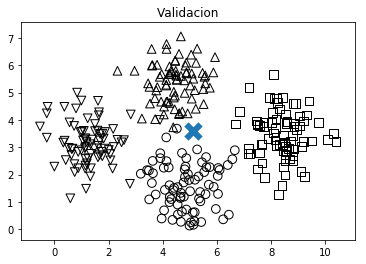

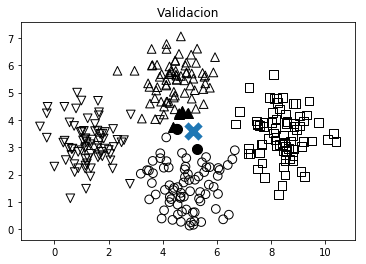

In [38]:
# Cajita

paso = 0.01
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

x_values, y_values = np.meshgrid(np.arange(x_min, x_max, paso), np.arange(y_min, y_max, paso))


# generamos la malla de colores de acuerdo a la prediccion del clasificador
salida  = clasificador.predict(np.c_[x_values.ravel(), y_values.ravel()])
salida = salida.reshape(x_values.shape)


# creamos el handle de la figura
plt.figure()

# hacemos la malla
plt.pcolormesh(x_values, y_values, salida, cmap = cm.Set3)


# graficamos los puntos de entrada 
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker = mapper[i], s = 50, edgecolors = 'black', facecolors='none')
    

# fijamos los limites de la figura

plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('Entrenamiento Clasificador k-NN')

test = [5.1, 3.6]

# Nuevo handle
plt.figure()
plt.title('Validacion')

for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker = mapper[i], s=75, edgecolors='black', facecolors='none')
    
plt.scatter(test[0], test[1], marker = 'x', linewidth = 6, s = 200)


# extraemos los k vecinos mas cercanos

_,indices = clasificador.kneighbors([test])
indices = indices.astype(np.int)[0]

# generamos un nuevo handle para graficar la k vecinos mas cercanos

plt.figure()
plt.title('Validacion')

for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker = mapper[i], s=75, edgecolors='black', facecolors='none')
    
plt.scatter(test[0], test[1], marker = 'x', linewidth = 6, s = 200)    

for i in indices:
    plt.scatter(X[i,0], X[i,1], marker = mapper[y[i]], s=100, facecolors='black')
    
    
plt.show()

In [41]:
print('Prediccion', clasificador.predict([test])[0])

Prediccion 1
